In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import date_range

In [3]:
os.chdir('/Users/chloe/Desktop/UVa/Courses/SYS6018/Exercises/Kaggle/Google/data')

In [4]:
raw_train = pd.read_csv('train.csv',low_memory=False) # (903653, 55)

In [5]:
raw_test = pd.read_csv('test.csv',low_memory=False)  # (804684, 53)

In [6]:
raw_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [7]:
train_df = raw_train.copy()
test_df = raw_test.copy()
raw_names = list(raw_train.columns)

In [8]:
# Some column names are too long and share same prefix, so we change them to short names.
for col in train_df.columns:
    newcol = col
    if col == 'channelGrouping':
        newcol = 'channel'
    elif col == 'fullVisitorId':
        newcol = 'Id'
    elif col == 'totals.transactionRevenue':
        newcol = 'revenue'
    elif col.startswith('socialEngagementType'):
        newcol = col.replace('socialEngagementType','social')
    elif col.startswith('device'):
        newcol = col.replace('device','d')
    elif col.startswith('geoNetwork'):
        newcol = col.replace('geoNetwork','g')
    elif col.startswith('trafficSource'):
        newcol = col.replace('trafficSource','t')
    train_df.rename(columns = {col:newcol}, inplace=True)
    test_df.rename(columns = {col:newcol}, inplace=True)

col_names = list(train_df.columns)

In [9]:
# Check renamed columns names.
col_names

['channel',
 'date',
 'Id',
 'sessionId',
 'social',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'd.browser',
 'd.browserSize',
 'd.browserVersion',
 'd.dCategory',
 'd.flashVersion',
 'd.isMobile',
 'd.language',
 'd.mobileDeviceBranding',
 'd.mobileDeviceInfo',
 'd.mobileDeviceMarketingName',
 'd.mobileDeviceModel',
 'd.mobileInputSelector',
 'd.operatingSystem',
 'd.operatingSystemVersion',
 'd.screenColors',
 'd.screenResolution',
 'g.city',
 'g.cityId',
 'g.continent',
 'g.country',
 'g.latitude',
 'g.longitude',
 'g.metro',
 'g.networkDomain',
 'g.networkLocation',
 'g.region',
 'g.subContinent',
 'totals.bounces',
 'totals.hits',
 'totals.newVisits',
 'totals.pageviews',
 'revenue',
 'totals.visits',
 't.adContent',
 't.adwordsClickInfo.adNetworkType',
 't.adwordsClickInfo.criteriaParameters',
 't.adwordsClickInfo.gclId',
 't.adwordsClickInfo.isVideoAd',
 't.adwordsClickInfo.page',
 't.adwordsClickInfo.slot',
 't.campaign',
 't.campaignCode',
 't.isTrueDirect',
 't.keyword',

### Missing value

In [10]:
# Check missing value
def get_na_rate(dataframe):
    na_count = dataframe.isnull().sum()
    na_rate = na_count / len(dataframe)
    na_df = pd.concat([na_count, na_rate], axis=1, keys=['count', 'percent'])
    na_df = na_df[na_df['percent']>0]
    na_df = na_df.sort_values(['percent'], ascending=False)
    return na_df

na_df = get_na_rate(train_df)
na_df

,count,percent
t.campaignCode,903652,0.999999
t.adContent,892707,0.987887
revenue,892138,0.987257
t.adwordsClickInfo.adNetworkType,882193,0.976252
t.adwordsClickInfo.isVideoAd,882193,0.976252
t.adwordsClickInfo.page,882193,0.976252
t.adwordsClickInfo.slot,882193,0.976252
t.adwordsClickInfo.gclId,882092,0.976140
t.isTrueDirect,629648,0.696781
t.referralPath,572712,0.633774


In [11]:
# t.campaignCode, t.adContent, t.adwords... contain more than 90% of NA Value
# Don't know how to deal with them ???????????
# Try dropping them first
train_df['t.isAdwords'] = train_df['t.adwordsClickInfo.adNetworkType'].notnull().astype(int)  
train_df = train_df.drop(['t.campaignCode','t.adContent','t.adwordsClickInfo.adNetworkType',
                         't.adwordsClickInfo.isVideoAd','t.adwordsClickInfo.page',
                          't.adwordsClickInfo.slot','t.adwordsClickInfo.gclId'],axis=1)
# Fill NA value in revenue with 0
train_df['revenue'] = train_df['revenue'].fillna(0)
# fill NAs in t.isTrueDirect with False
train_df['t.isTrueDirect'] = train_df['t.isTrueDirect'].notnull().astype(int)

# The referral path has too many scattered value, create another value to represent its exsistence.
train_df['t.isReferralPath'] = train_df['t.referralPath'].notnull().astype(int)  
train_df['t.isKeyword'] = train_df['t.keyword'].notnull().astype(int) 
train_df = train_df.drop(['t.referralPath','t.keyword'],axis=1)

# According to the bounce's definition: "It represents the percentage of visitors who 
# enter the site and then leave ("bounce") rather than continuing to view other pages 
# within the same site."
# Fill NA value with 0.
train_df['totals.bounces'] = train_df['totals.bounces'].fillna(0)

# Same way to deal with the NA value in totals.newVisits.
train_df['totals.newVisits'] = train_df['totals.newVisits'].fillna(0)

# Fill NA value in pageviews with median.
train_df['totals.pageviews'] = train_df['totals.pageviews'].fillna(train_df['totals.pageviews'].median())


In [12]:
# Check again if there is any missing value
get_na_rate(train_df)

,count,percent


In [13]:
# Many columns have constant value
train_df.iloc[:,8:].describe()

,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,revenue,totals.visits,t.isTrueDirect,t.isAdwords,t.isReferralPath,t.isKeyword
count,903653.000000,903653.000000,903653.000000,903653.000000,9.036530e+05,903653.0,903653.000000,903653.000000,903653.000000,903653.000000
mean,0.498676,4.596538,0.778020,3.849449,1.704273e+06,1.0,0.303219,0.023748,0.366226,0.443449
std,0.499999,9.641437,0.415578,7.024949,5.277866e+07,0.0,0.459649,0.152263,0.481772,0.496792
min,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,4.000000,0.000000e+00,1.0,1.000000,0.000000,1.000000,1.000000
max,1.000000,500.000000,1.000000,469.000000,2.312950e+10,1.0,1.000000,1.000000,1.000000,1.000000


In [14]:
train_id = list(set(train_df['Id'])) # 714167 unique ID in training set
test_id = list(set(test_df['Id']))   # 617242 unique ID in training set
inter_id = list(set(train_id).intersection(test_id)) # Only 7679 test IDs are in train's ID list

In [15]:
cols_unique = train_df.columns[train_df.nunique(dropna=False)==1]
cols_unique

Index(['social', 'd.browserSize', 'd.browserVersion', 'd.flashVersion',
       'd.language', 'd.mobileDeviceBranding', 'd.mobileDeviceInfo',
       'd.mobileDeviceMarketingName', 'd.mobileDeviceModel',
       'd.mobileInputSelector', 'd.operatingSystemVersion', 'd.screenColors',
       'd.screenResolution', 'g.cityId', 'g.latitude', 'g.longitude',
       'g.networkLocation', 'totals.visits',
       't.adwordsClickInfo.criteriaParameters'],
      dtype='object')

### Revenue

/Users/chloe/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chloe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of revenue > 0')

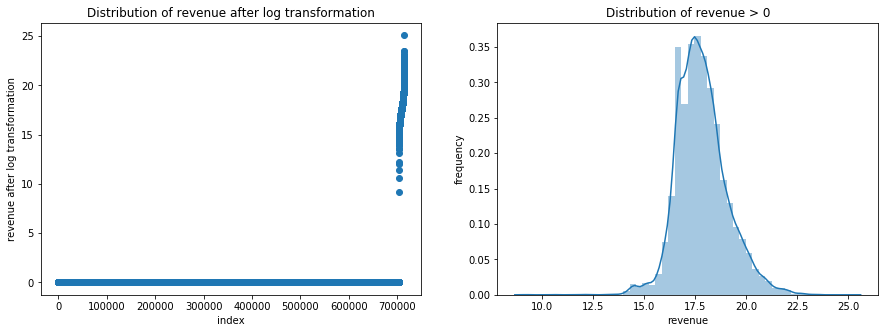

In [16]:
# Have a look at the revenue which is what we are going to predict
# From the graph, we can see there is a clear pattern which is consistent
# with the 80/20 rule.
plt.subplots(ncols=2, figsize=(15,5))
plt.subplot(121)
revenue = train_df.groupby('Id')['revenue'].sum().reset_index()
revenue['revenue'] = np.log1p(revenue['revenue'].values) # takes natural log of revenue as is required in the competition
plt.scatter(range(revenue.shape[0]),np.sort(revenue['revenue']))
plt.xlabel('index')
plt.ylabel('revenue after log transformation')
plt.title('Distribution of revenue after log transformation')
plt.subplot(122)
sns.distplot(revenue[revenue['revenue']>1]['revenue'])
plt.ylabel('frequency')
plt.title('Distribution of revenue > 0')

In [17]:
train_df['revenue'].astype('bool').sum(axis=0)/len(train_df) # Only 1.27% of visitor makes transaction.
id_nonzero = set(train_df[train_df['revenue'] != 0]['Id']) # 9996 visitors who actually did make transactions
id_zero = set(train_df[train_df['revenue'] == 0]['Id'])-id_nonzero  # 704171 visitors who didn't make any transaction
nonzero_df = train_df[train_df['Id'].isin(id_nonzero)]  # 36110
zero_df = train_df[train_df['Id'].isin(id_zero)]        # 867543

### channelGrouping 

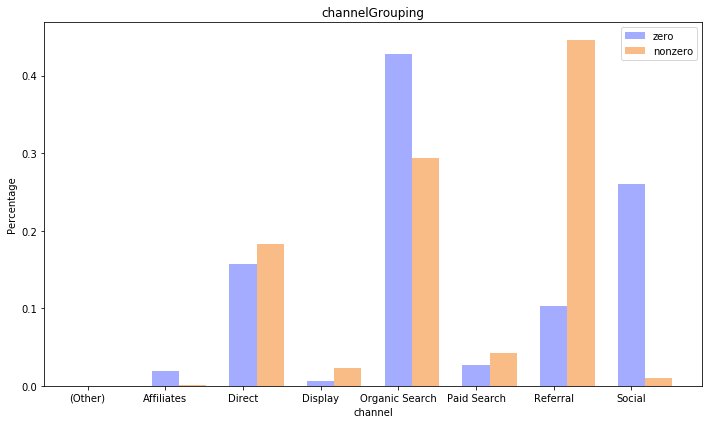

In [18]:
# Top 3 channels for visitors with no revenue: Organic search, Social and Direct.
# Top 3 channels for visitors with revenue: Referral, Organic search and Direct.
# Referal plays an important role in differentiating the visitors.

def plot_two_groups(column):
    channel_zero = zero_df.groupby(column)[column].count()/len(zero_df)
    channel_nonzero = nonzero_df.groupby(column)[column].count()/len(nonzero_df)
    ind = np.arange(len(channel_zero))
    width = 0.35
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(ind, channel_zero, width=0.35,  color='#a3acff', label='zero')
    ax.bar(ind+width, channel_nonzero, width=0.35, color='#f9bc86', label='nonzero')
    title = raw_train.columns[col_names.index(column)]
    plt.xticks(ind, channel_zero.index)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_two_groups('channel')

### Device

In [19]:
device_cols = [col for col in train_df.columns if col.startswith('d.')and col not in cols_unique]
device_cols

['d.browser', 'd.dCategory', 'd.isMobile', 'd.operatingSystem']

#### Device.Browser

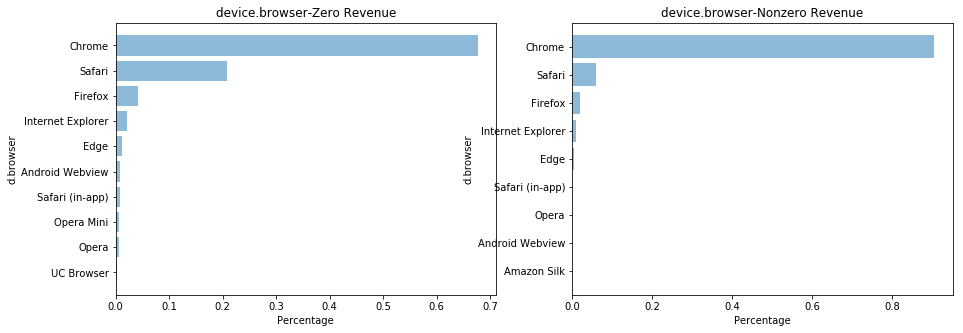

In [20]:
# Visitors with zero revenue and non-zero revenue share the same top 3 frequently used browsers.
# While visitors with zero revenue tends to have a higher tendency of using the these browsers.
def plot_diff_groups(column, k_zero=0, k_nonzero=0):     # k_zero, k_nonzero: top k classes to be displayed.
    browser_zero = zero_df.groupby(column)[column].count().sort_values()/len(zero_df)
    browser_nonzero = nonzero_df.groupby(column)[column].count().sort_values()/len(nonzero_df)
    title = raw_train.columns[col_names.index(column)]
    plt.subplots(ncols=2, figsize=(15,5))
    plt.subplot(121)
    plt.barh(browser_zero.index[-k_zero:], browser_zero[-k_zero:], align='center', alpha=0.5)
    plt.xlabel('Percentage')
    plt.ylabel(column)
    plt.title(title+"-Zero Revenue")
    plt.subplot(122)
    plt.barh(browser_nonzero.index[-k_nonzero:], browser_nonzero[-k_nonzero:], align='center', alpha=0.5)
    plt.xlabel('Percentage')
    plt.ylabel(column)
    plt.title(title+"-Nonzero Revenue")
    plt.show()
plot_diff_groups('d.browser',10)

#### Device.dCategory

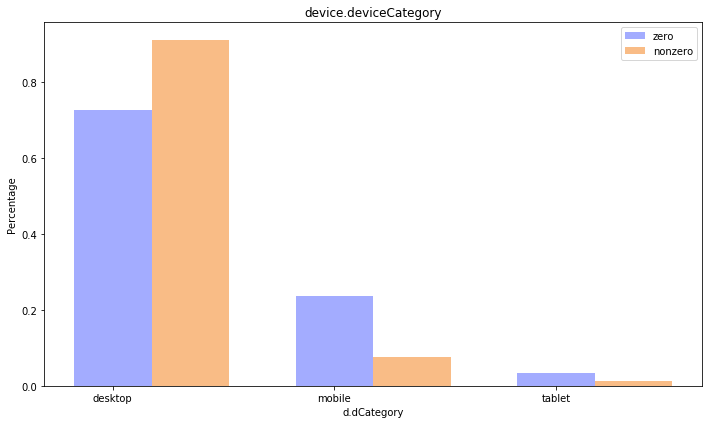

In [21]:
# Both visitors groups use desktop to access the Store most frequently.
# Visitors with revenue have a higher tendency of using desktop.

plot_two_groups('d.dCategory')

#### Device.isMobile

In [22]:
# Visitors who actually made transactions prefered not to use the mobile phone to access the Store.

train_df['isRevenue'] = raw_train['totals.transactionRevenue'].notnull().astype(int)
binary_table = train_df.groupby('isRevenue').sum()
binary_table.iloc[0,:] = binary_table.iloc[0,:]/len(zero_df)
binary_table.iloc[1,:] = binary_table.iloc[1,:]/len(nonzero_df)
binary_table['d.isMobile']

isRevenue
0    0.274457
1    0.028247
Name: d.isMobile, dtype: float64

#### Device.operatingSystem

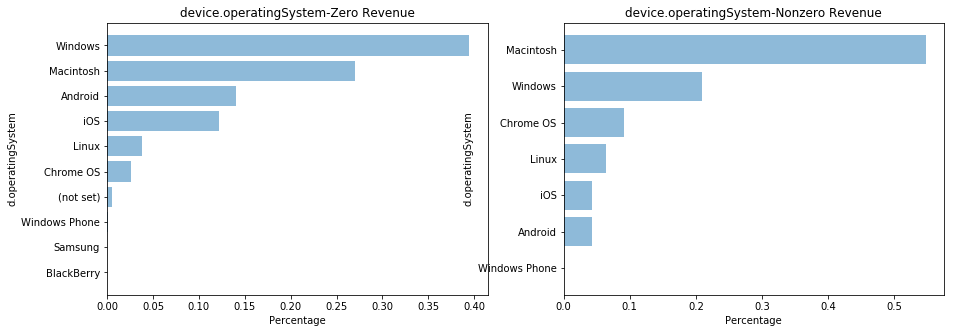

In [23]:
# Top 3 operating systems for visitors with no revenue: Windows, Mac and Android.
# Top 3 channels for visitors with revenue: Mac, Windows and Chrome OS.
# More than half of the visitors with revenue used mac to access Store.

plot_diff_groups('d.operatingSystem',10)

### GeoNetwork

In [24]:
geo_cols = [col for col in train_df.columns if col.startswith('g.')and col not in cols_unique]
geo_cols

['g.city',
 'g.continent',
 'g.country',
 'g.metro',
 'g.networkDomain',
 'g.region',
 'g.subContinent']

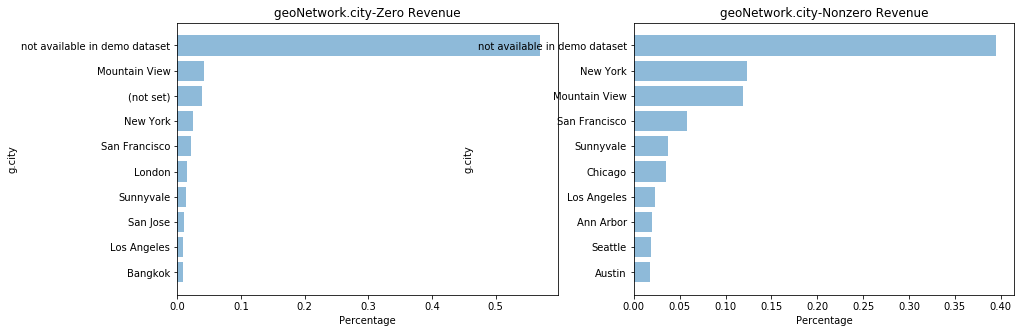

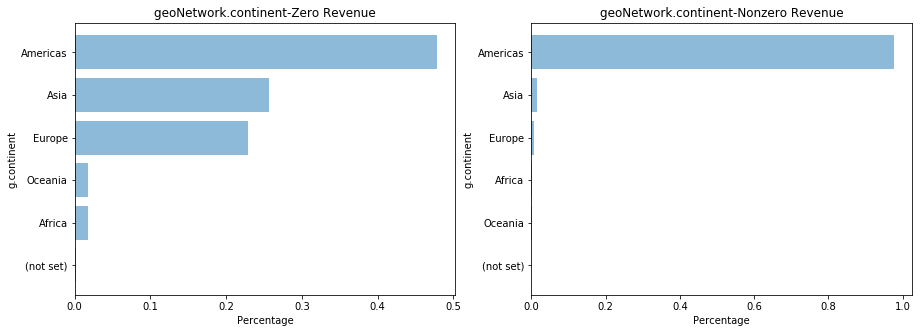

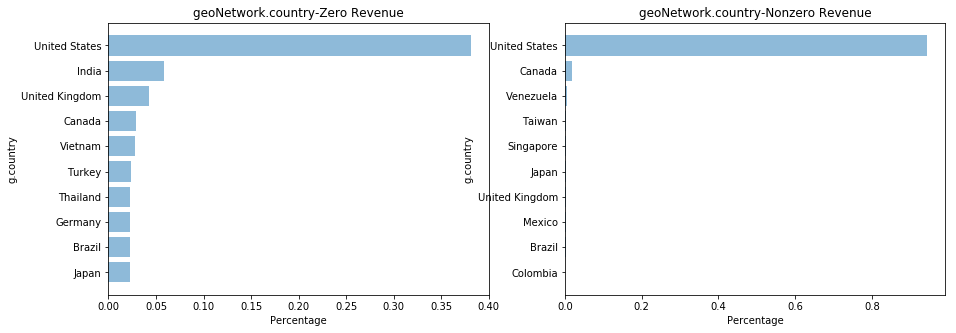

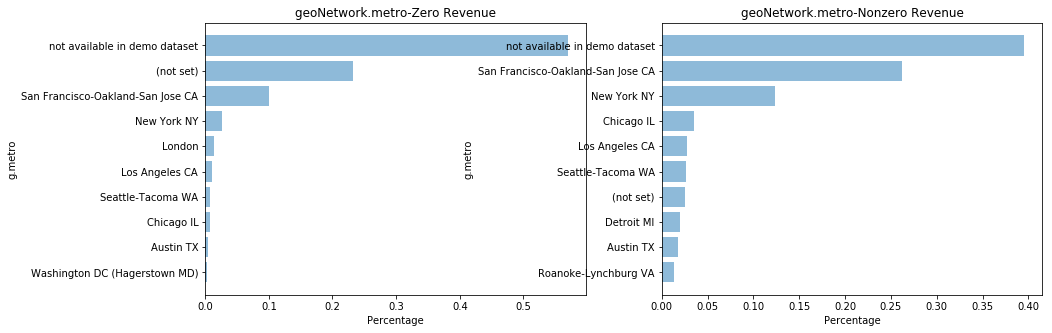

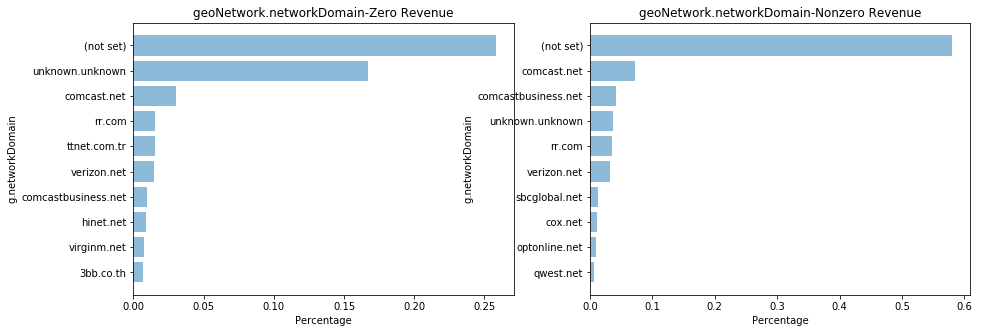

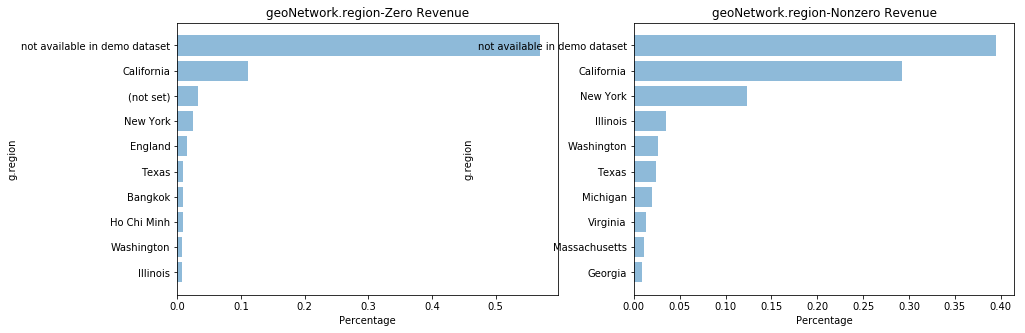

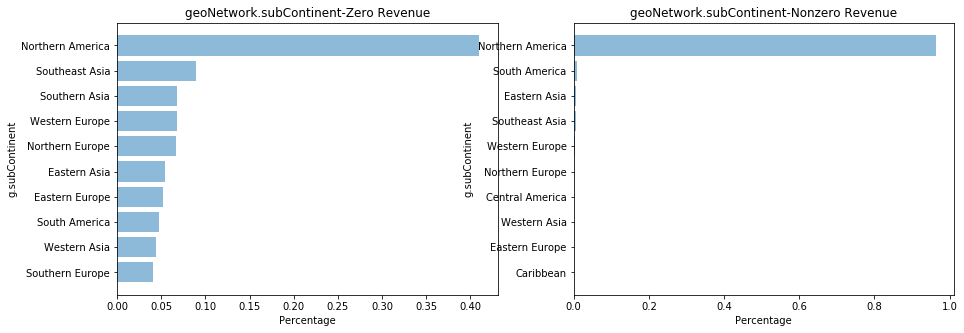

In [25]:
# All the plots can be shown together with the commands below.
# In order to look at each column in detail, I will plot them one by one.
for item in geo_cols:
    plot_diff_groups(item,10,10)

#### GeoNetwork.city

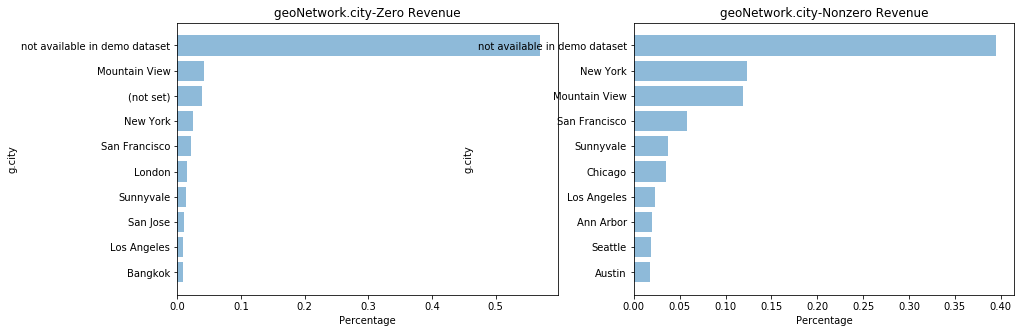

In [26]:
# Not much to tell from the two graphs because the majority of records are not available.
# New York and Mountain View are two major cities where the visitors making transactions come from among all the cities.

plot_diff_groups('g.city',10,10)

#### geoNetwork.continent

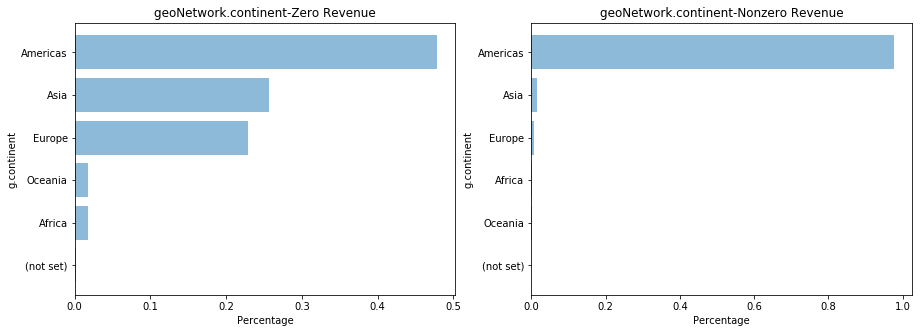

In [27]:
# It is not suprised to see that almost all the visitors who made transactions are Americas.
# Although many Asian and European people also visit the stores, they seldomly made purchase.

plot_diff_groups('g.continent')

#### geoNetwork.country

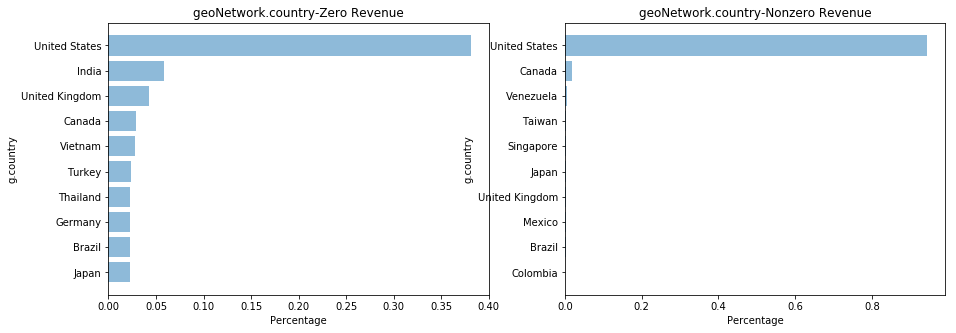

In [28]:
# Most of visitors who made purchase are from US which is consistent with the continent.

plot_diff_groups('g.country',10,10)

#### geNetwork.networkDomain

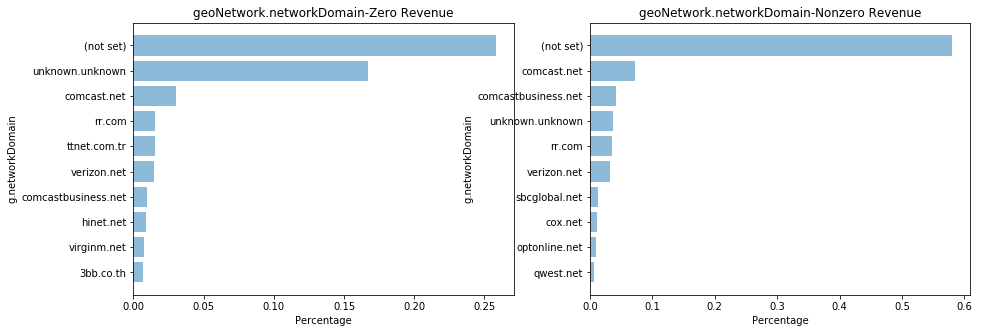

In [29]:
# Not much to tell from these two graphs.

plot_diff_groups('g.networkDomain',10,10)

#### geoNetwork.metro

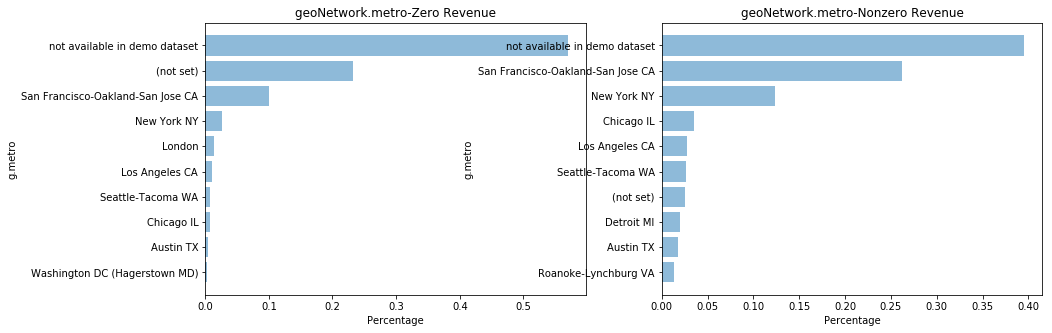

In [30]:
# The result is consistent with what we found in the city. Bay area and New York are the two major areas where visitors
# making purchases came from in the available dataset.

plot_diff_groups('g.metro',10,10)

#### geoNetwork.region

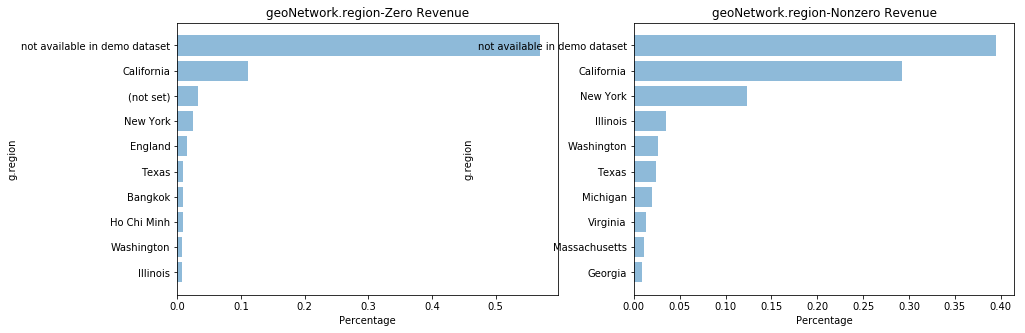

In [31]:
# Still, California and New York are the two major states where visitors making transactions came from
# (in the available dataset).

plot_diff_groups('g.region',10,10)

#### geoNetwork.subContinent

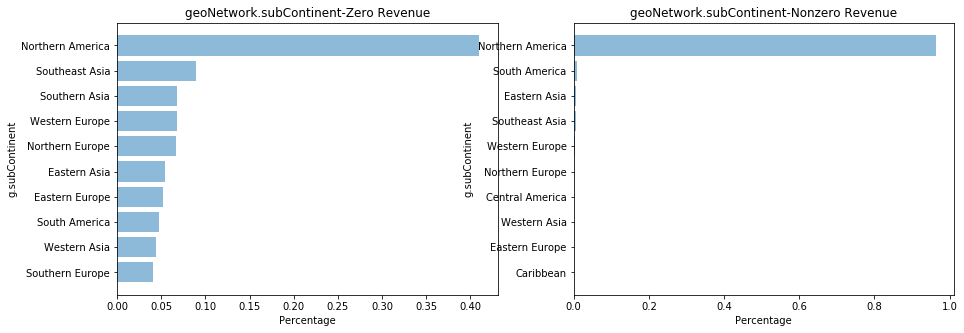

In [32]:
# Not much to tell.

plot_diff_groups('g.subContinent',10,10)

### Traffic

In [33]:
# Most of traffic's variables have either contant value or too many missing value (more than 90%).
traffic_cols = [col for col in train_df.columns if col.startswith('t.')and col not in cols_unique]
traffic_cols

['t.campaign',
 't.isTrueDirect',
 't.medium',
 't.source',
 't.isAdwords',
 't.isReferralPath',
 't.isKeyword']

#### traffic.campaign

In [34]:
# Both groups have a majority of "not set" (more than 90%)

campaign_zero = zero_df.groupby('t.campaign')['t.campaign'].count()/len(zero_df)
campaign_nonzero = nonzero_df.groupby('t.campaign')['t.campaign'].count()/len(nonzero_df)

#### traffic.isTrueDirect, isAdwords, isReferralPath and isKeyword

In [35]:
# The percentage of traffic source which is direct, have adwords, is referral path is higher
# in visitors making purchase than that in visitors with no revenue.
# The visitors with no revenue have a higher percentage of traffic source containing keyword.

binary_table[['t.isTrueDirect','t.isAdwords','t.isReferralPath','t.isKeyword']]

,t.isTrueDirect,t.isAdwords,t.isReferralPath,t.isKeyword
isRevenue,,,,
0,0.307767,0.024213,0.375228,0.457445
1,0.193963,0.012573,0.149958,0.107200


#### traffic.medium

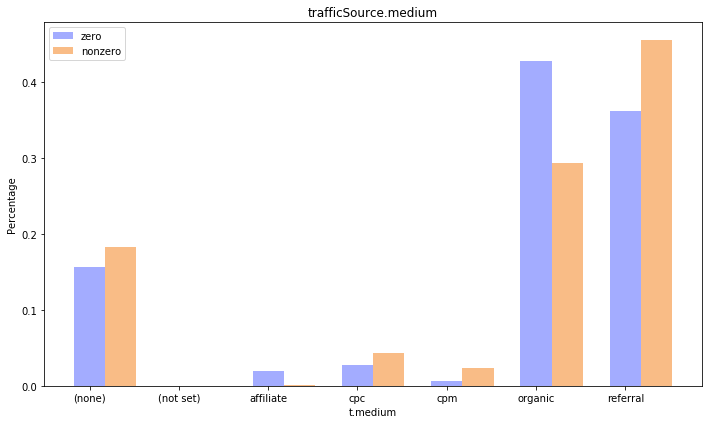

In [36]:
# Visitors with revenue tend to have traffic with referral??? How to interpret this.
# Visitors with revenue tend to have traffic with organic??? How to interpret this.

plot_two_groups('t.medium')

#### traffic.source

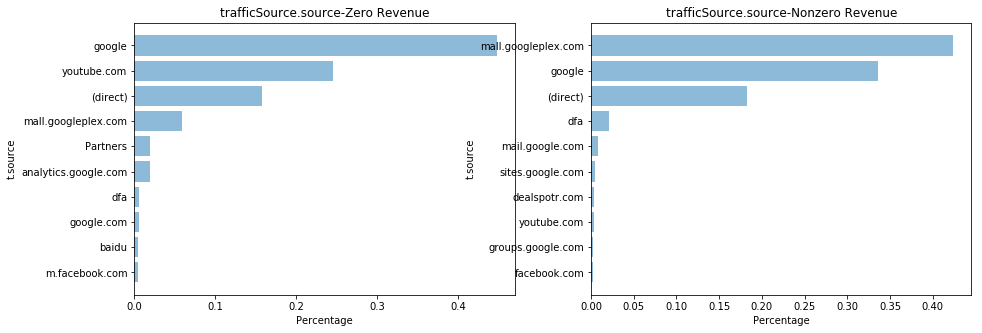

In [37]:
# There is a large difference in the traffic sources of two groups
# Top 3 sources for visitors with no revenue: google, youtube and direct
# Top 3 sources for visitors with revenue: mail.googleplex.com, google and direct
# It is interesting to see that nearly half of the visitors who made transaction got the source from mail.googleplex.com.
# Are these visitors are actually Google people themselves? 
plot_diff_groups('t.source',10,10)

### Totals

In [38]:
total_cols = [col for col in train_df.columns if col.startswith('totals.')and col not in cols_unique]
total_cols

['totals.bounces', 'totals.hits', 'totals.newVisits', 'totals.pageviews']

#### totals.bounces, newVisits

In [39]:
# It is obvious that visitors who make purchase would not leave the site without viewing
# pages.
# More visitors with no revenue are new visitors.

binary_table[['totals.bounces','totals.newVisits']]

,totals.bounces,totals.newVisits
isRevenue,,
0,0.519432,0.805257
1,0.000000,0.123650


#### Totals.hits

Text(0.5,1,'frequency of hits')

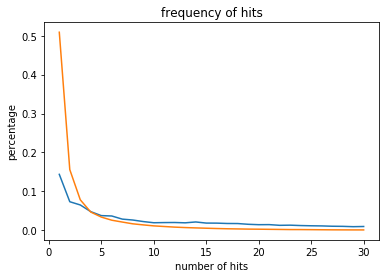

In [40]:
# 1. Check the difference in the frequency of hits between two groups
# It seems that visitors who make purchase hits more
hits_zero_per = zero_df.groupby('totals.hits')['totals.hits'].count()/len(zero_df) # Median: 8.5
hits_nonzero_per = nonzero_df.groupby('totals.hits')['totals.hits'].count()/len(nonzero_df) # Median: 8.0
plt.plot(hits_nonzero_per.index[:30],hits_nonzero_per[:30])
plt.plot(hits_zero_per.index[:30],hits_zero_per[:30])
plt.xlabel('number of hits')
plt.ylabel('percentage')
plt.title('frequency of hits')

In [41]:
# 2. Check the relatioinship between the revenue and total hits in one session
# Excludes those super large number of hits which only occurs once
hits_nonzero = nonzero_df.groupby('totals.hits')['totals.hits'].count()
hits_more_than_one = hits_nonzero[hits_nonzero > 1].index
hits_more_df  = nonzero_df[nonzero_df['totals.hits'].isin(hits_more_than_one)]
hits_revenue_avg = hits_more_df.groupby('totals.hits')['revenue'].mean()

Text(0.5,1,'avearge reveune (hits < 50)')

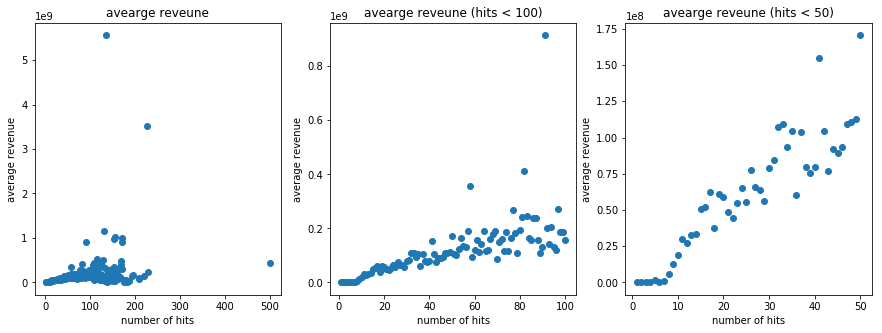

In [42]:
# It can be seen that the revenue tends to increase with the increase in number of hits.

plt.subplots(ncols=3, figsize=(15,5))
plt.subplot(131)
plt.scatter(hits_revenue_avg.index,hits_revenue_avg)
plt.xlabel('number of hits')
plt.ylabel('average revenue')
plt.title('avearge reveune')
plt.subplot(132)
plt.scatter(hits_revenue_avg.index[:100],hits_revenue_avg[:100])
plt.xlabel('number of hits')
plt.ylabel('average revenue')
plt.title('avearge reveune (hits < 100)')
plt.subplot(133)
plt.scatter(hits_revenue_avg.index[:50],hits_revenue_avg[:50])
plt.xlabel('number of hits')
plt.ylabel('average revenue')
plt.title('avearge reveune (hits < 50)')

#### totals.pageviews

Text(0.5,1,'frequency of page views')

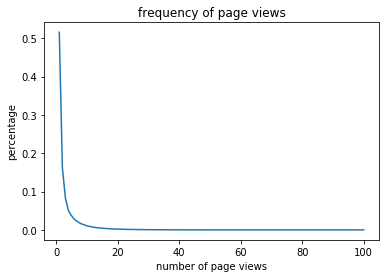

In [43]:
hits_zero_per = zero_df.groupby('totals.pageviews')['totals.pageviews'].count()/len(zero_df) # Median: 8.5
hits_nonzero_per = nonzero_df.groupby('totals.pageviews')['totals.pageviews'].count()/len(nonzero_df) # Median: 8.0
#plt.plot(hits_nonzero_per.index[:20],hits_nonzero_per[:20])
plt.plot(hits_zero_per.index[:100],hits_zero_per[:100])
plt.xlabel('number of page views')
plt.ylabel('percentage')
plt.title('frequency of page views')

Text(0.5,1,'Number of page views vs Total revenue')

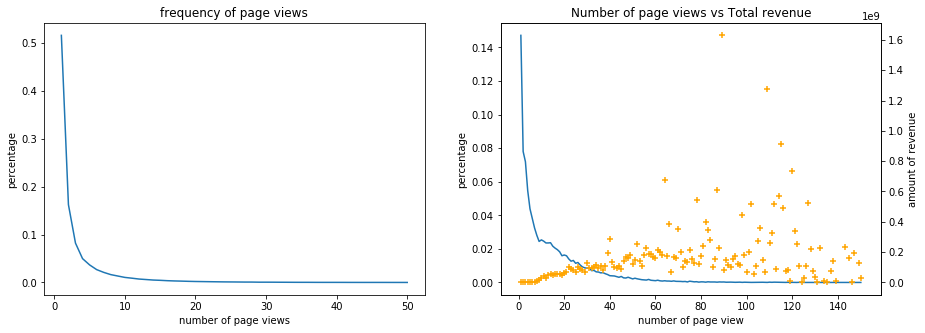

In [44]:
# All the visitors who make purchase view the page more than once
# It seems the number of page view has nothing to do with the revenue.
plt.subplots(ncols=2, figsize=(15,5))
page_zero_per = zero_df.groupby('totals.pageviews')['totals.pageviews'].count()/len(zero_df) 
page_nonzero_per = nonzero_df.groupby('totals.pageviews')['totals.pageviews'].count()/len(nonzero_df) 
page_nonzero_per = page_nonzero_per[:150]
page_revenue = nonzero_df.groupby('totals.pageviews')['revenue'].mean()[:150]
plt.subplot(121)
plt.plot(page_zero_per.index[:50],page_zero_per[:50])
plt.xlabel('number of page views')
plt.ylabel('percentage')
plt.title('frequency of page views')
ax1 = plt.subplot(122)
plt.plot(page_nonzero_per.index,page_nonzero_per)
ax2 = ax1.twinx()
ax2.scatter(page_revenue.index,page_revenue, color='orange',marker='+')
ax1.set_xlabel('number of page view')
ax1.set_ylabel('percentage')
ax2.set_ylabel('amount of revenue')
plt.title("Number of page views vs Total revenue")

### Time Series Plot

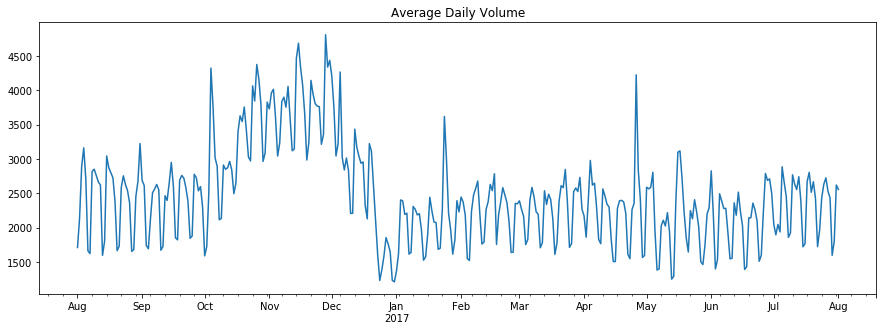

In [45]:
# There is an increase from Oct 2016 to Dec 2016, which is probably due to the holiday season.

plt.subplots(figsize=(15,5))
daily_count = train_df.groupby('date')['Id'].count()
ts = pd.Series(daily_count.values, index=date_range('8/1/2016', '8/1/2017'))
ts.plot(title='Average Daily Volume')

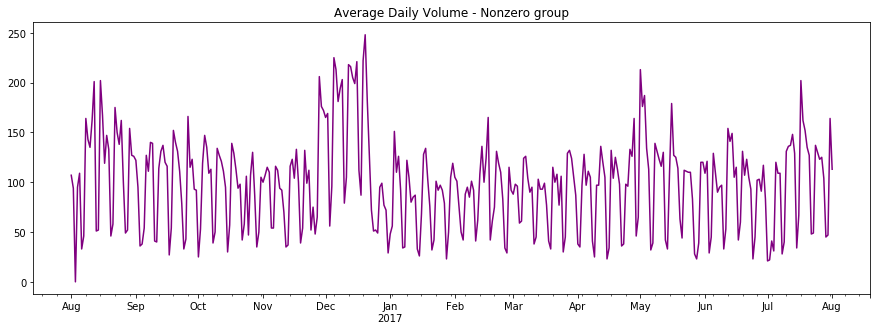

In [46]:
plt.subplots(figsize=(15,5))
daily_count = nonzero_df.groupby('date')['Id'].count()
daily_count.loc[20160803] = 0
daily_count.sort_index()
ts = pd.Series(daily_count.values, index=date_range('8/1/2016', '8/1/2017'))
ts.plot(title='Average Daily Volume - Nonzero group',color='purple')

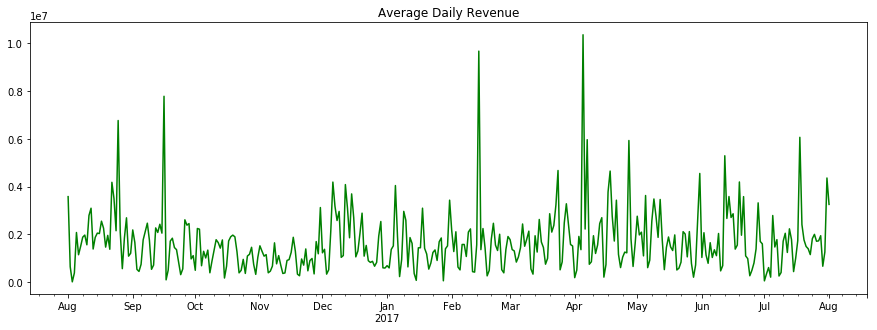

In [47]:
# Not much paterns in Average Daily Revenue.

plt.subplots(figsize=(15,5))
daily_rev = train_df.groupby('date')['revenue'].mean()
ts = pd.Series(daily_rev.values, index=date_range('8/1/2016', '8/1/2017'))
ts.plot(title='Average Daily Revenue',color='green')

### visitNumber

Text(0.5,1,'average revenue per session')

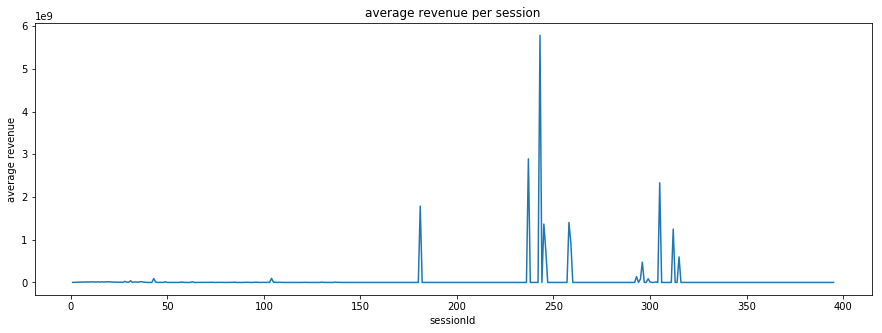

In [59]:
# Most of peaks occur within the interval of 300 to 400.

plt.subplots(figsize=(15,5))
vNum_rev = train_df.groupby('visitNumber')['revenue'].mean()
plt.plot(vNum_rev.index, vNum_rev)
plt.xlabel('sessionId')
plt.ylabel('average revenue')
plt.title('average revenue per session')